In [2]:
df <- data.frame(name = c('Jon', 'Bill', 'Maria'),
                 age = c(23, 41, 32)
                 )
print (df)

   name age
1   Jon  23
2  Bill  41
3 Maria  32


In [13]:
install.packages("dslabs")


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [ ]:
library(tidyverse)

In [6]:
library(RColorBrewer)
display.brewer.all(type="seq")

In [14]:
library(tidyverse)
library(RColorBrewer)
library(dslabs)
data(us_contagious_diseases)
names(us_contagious_diseases)
#> [1] "disease"         "state"           "year"           
#> [4] "weeks_reporting" "count"           "population"

[1] "disease"         "state"           "year"            "weeks_reporting"
[5] "count"           "population"

In [15]:
the_disease <- "Measles"
dat <- us_contagious_diseases %>%
  filter(!state%in%c("Hawaii","Alaska") & disease == the_disease) %>%
  mutate(rate = count / population * 10000 * 52 / weeks_reporting) %>% 
  mutate(state = reorder(state, rate)) 

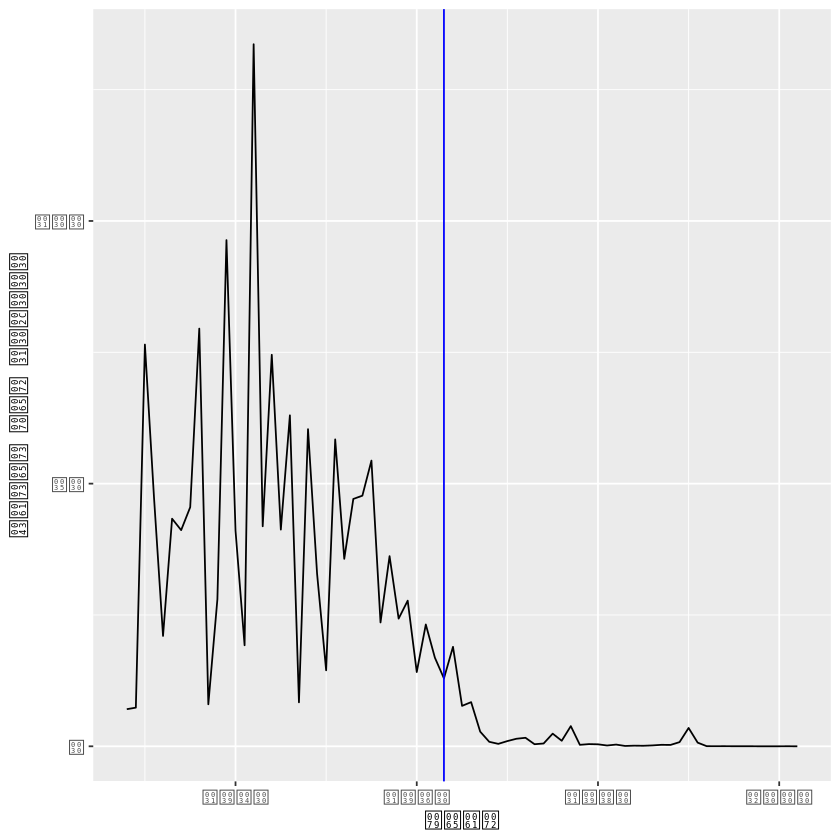

In [16]:
dat %>% filter(state == "California" & !is.na(rate)) %>%
  ggplot(aes(year, rate)) +
  geom_line() + 
  ylab("Cases per 10,000")  + 
  geom_vline(xintercept=1963, col = "blue")

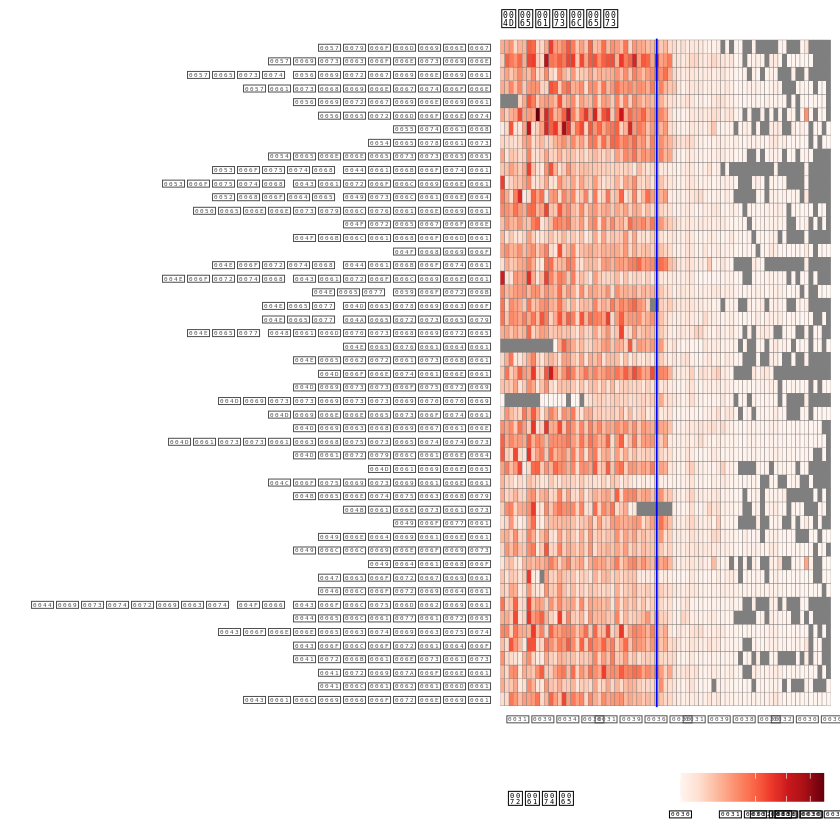

In [19]:
dat %>% ggplot(aes(year, state, fill = rate)) +
  geom_tile(color = "grey50") +
  scale_x_continuous(expand=c(0,0)) +
  scale_fill_gradientn(colors = brewer.pal(9, "Reds"), trans = "sqrt") +
  geom_vline(xintercept=1963, col = "blue") +
  theme_minimal() +  
  theme(panel.grid = element_blank(), 
        legend.position="bottom", 
        text = element_text(size = 8)) +
  ggtitle(the_disease) + 
  ylab("") + xlab("")